# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [54]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [55]:
# The total number of records
data.shape[0]

45222

In [56]:
# The number of individuals making more than $50000 annually
(data['income'] == '>50K').sum()

11208

In [57]:
# The number of individuals making at most $50000 annually
(data['income'] == '<=50K').sum()

34014

In [58]:
# The percentage of individuals making at more than $50000 annually
(data['income'] == '>50K').sum() / data.shape[0]

0.2478439697492371

### Exercise 2 Preprocessing 

In [59]:
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

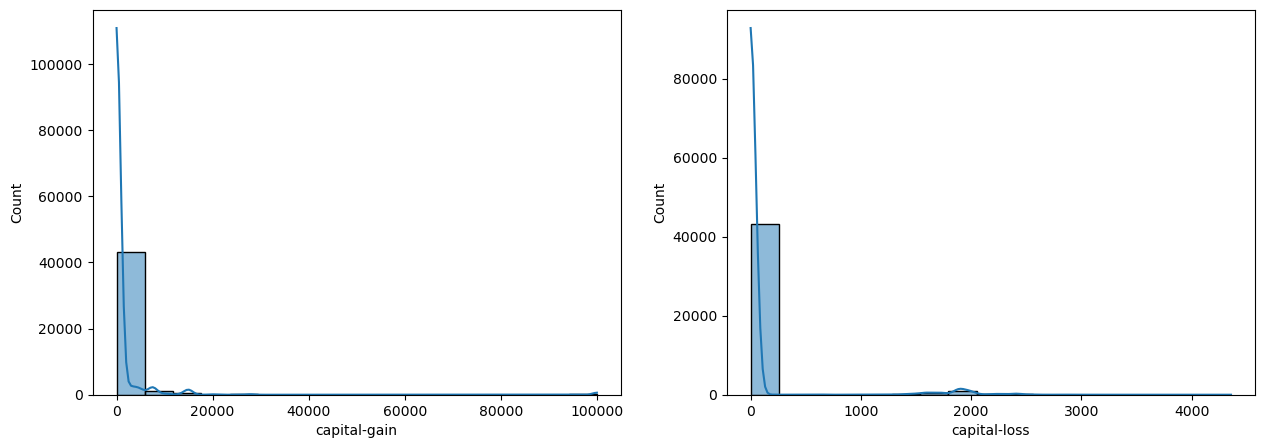

In [60]:
# Visualize skewed continuous features of original data
fig, axes = plt.subplots(1, 2, figsize=[15, 5])
sns.histplot(data['capital-gain'], kde=True, ax=axes[0])
sns.histplot(data['capital-loss'], kde=True, ax=axes[1])
plt.show()

In [61]:
# Outliers Treatment
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# plt.subplot(1, 2, 1)
# data['capital-gain'].plot.box()
# plt.subplot(1, 2, 2)
# data['capital-loss'].plot.box()
# plt.show()

data['log_gain'] = np.log(data['capital-gain'] + 1e-6)
data['log_loss'] = np.log(data['capital-loss'] + 1e-6)

data['Z_gain'] = stats.zscore(data['log_gain'])
data['Z_loss'] = stats.zscore(data['log_gain'])

data = data[(data['Z_gain'] > -3) & (data['Z_gain'] < 3) &
            (data['Z_loss'] > -3) & (data['Z_loss'] < 3)].drop(columns=['Z_gain', 'Z_loss'])

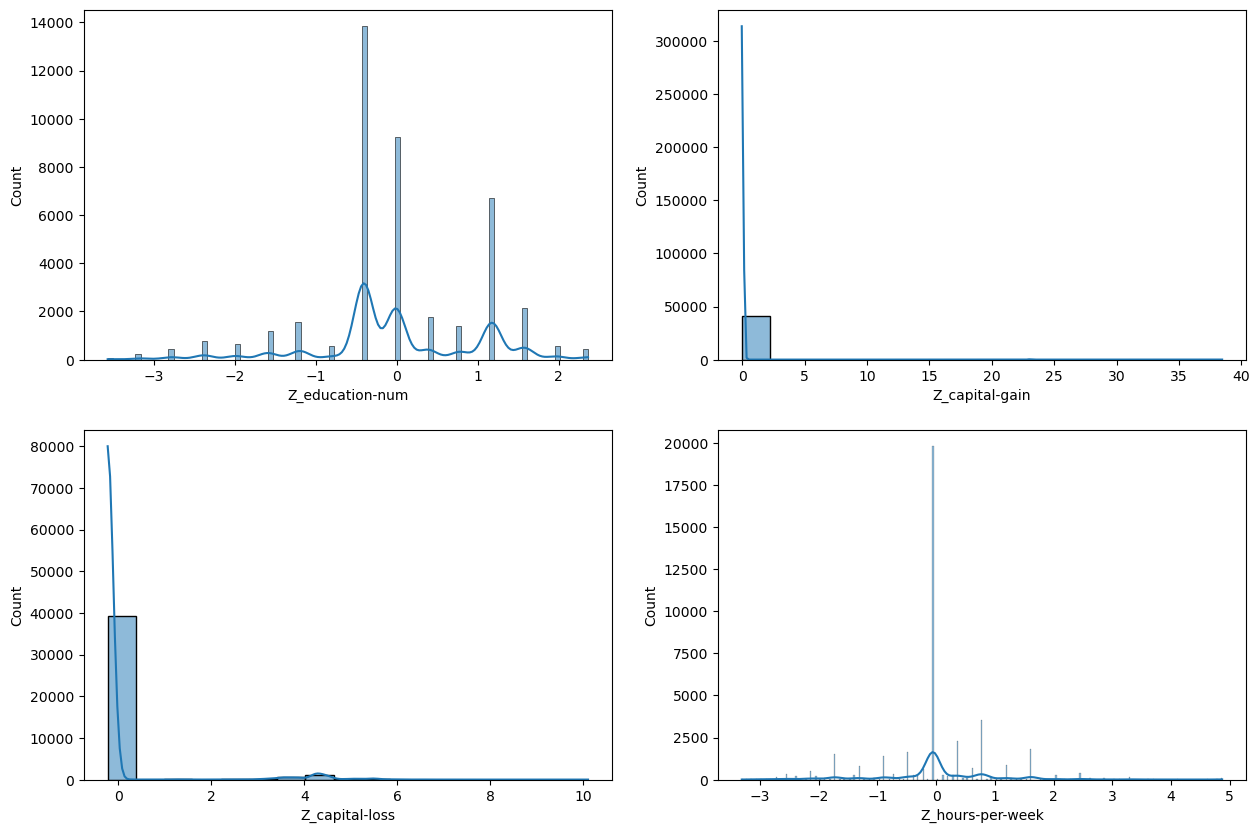

In [62]:
# Data Transformation
numeral = ['education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Z_numeral = ['Z_education-num', 'Z_capital-gain', 'Z_capital-loss', 'Z_hours-per-week']
data[Z_numeral] = StandardScaler().fit_transform(data[numeral])
data[Z_numeral].head()
fig, axes = plt.subplots(2, 2, figsize=[15, 10])
sns.histplot(data['Z_education-num'], kde=True, ax=axes[0][0])
sns.histplot(data['Z_capital-gain'], kde=True, ax=axes[0][1])
sns.histplot(data['Z_capital-loss'], kde=True, ax=axes[1][0])
sns.histplot(data['Z_hours-per-week'], kde=True, ax=axes[1][1])
plt.show()

# Perform one-hot encoding on the data
discrete = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
one_hot = pd.get_dummies(data[discrete])
data['sex'].replace([' Male', ' Female'], [True, False], inplace=True)
data['income'].replace(['<=50K', '>50K'], [False, True], inplace=True)
df = data[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
df = pd.concat([df, one_hot, data['income']],axis=1)

### Exercise 3 Shuffle and Split Data

In [63]:
# Split the 'feature' and 'income' data into training and testing sets
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

X_train

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
26539,46,7.0,0.0,0.0,40.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
890,35,10.0,0.0,0.0,60.0,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
21721,42,4.0,0.0,0.0,35.0,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
40382,40,13.0,0.0,1977.0,40.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5647,44,9.0,0.0,0.0,45.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,25,13.0,0.0,0.0,40.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
35012,60,9.0,0.0,0.0,40.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
33177,42,9.0,0.0,0.0,40.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
23136,20,10.0,0.0,0.0,50.0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

/home/artanisax/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy =  0.8428915662650602
Random Forest Accuracy =  0.8387951807228916
Decision Forest Accuracy =  0.8103614457831325


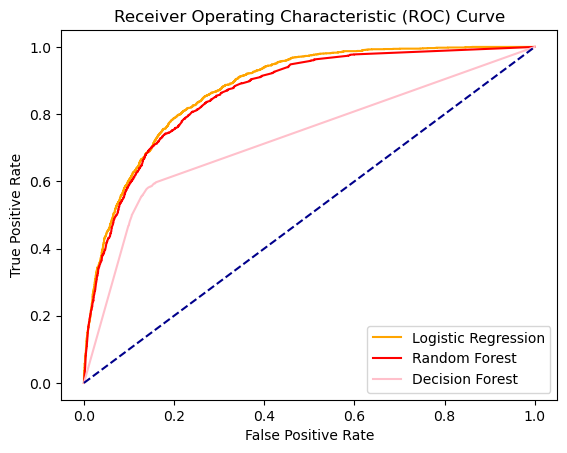

In [64]:
# Evaluating Model
LR = LogisticRegression(max_iter=100)
LR.fit(X_train, y_train)
y_predict_proba = LR.predict_proba(X_test) 
print('Logistic Regression Accuracy = ', metrics.accuracy_score(y_predict_proba[:, 1] > 0.5, y_test))
fper, tper, thresholds = metrics.roc_curve(y_test, y_predict_proba[:, 1]) 
plt.plot(fper, tper, color='orange', label='Logistic Regression')

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict_proba = RF.predict_proba(X_test) 
print('Random Forest Accuracy = ', metrics.accuracy_score(y_predict_proba[:, 1] > 0.5, y_test))
fper, tper, thresholds = metrics.roc_curve(y_test, y_predict_proba[:, 1]) 
plt.plot(fper, tper, color='red', label='Random Forest')

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_predict_proba = DT.predict_proba(X_test) 
print('Decision Tree Accuracy = ', metrics.accuracy_score(y_predict_proba[:, 1] > 0.5, y_test))
fper, tper, thresholds = metrics.roc_curve(y_test, y_predict_proba[:, 1]) 
plt.plot(fper, tper, color='pink', label='Decision Forest')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [65]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000
prediction = [True for _ in range(len(y_test))]
acc = metrics.accuracy_score(prediction, y_test)
f_score = metrics.f1_score(prediction, y_test)
print('Acc = ', acc)
print('F = ', f_score)

Acc =  0.21108433734939758
F =  0.3485873458018305


### Exercise 5 Evaluating Model 

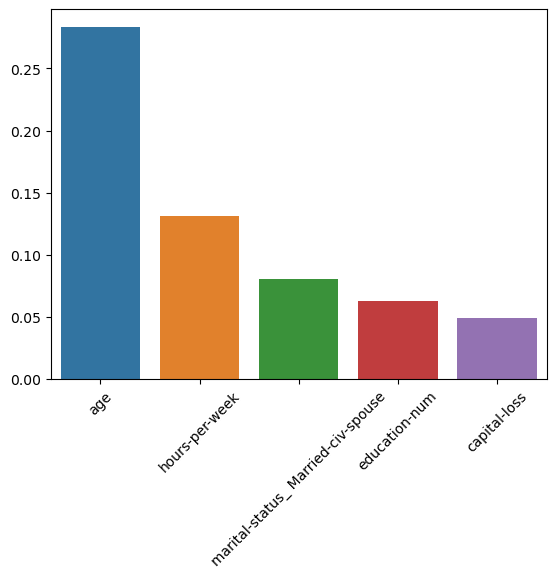

In [66]:
importances = RF.feature_importances_
indices = np.argsort(-importances)
importances = importances[indices]
important_names = df.columns[indices]

ax = sns.barplot(x=important_names[:5], y=importances[:5])
ax.set_xticklabels(labels=important_names[:5], rotation = 45)
plt.show()

## Question:
### Q1: